Dataset Loaded Successfully!

   Hours_Studied  Marks
0            1.0     20
1            2.0     30
2            2.5     35
3            3.0     40
4            3.5     45

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  25 non-null     float64
 1   Marks          25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None

Summary Statistics:
       Hours_Studied      Marks
count      25.000000  25.000000
mean        5.540000  60.280000
std         2.676285  21.098025
min         1.000000  20.000000
25%         3.500000  45.000000
50%         5.500000  63.000000
75%         7.500000  77.000000
max        10.000000  92.000000


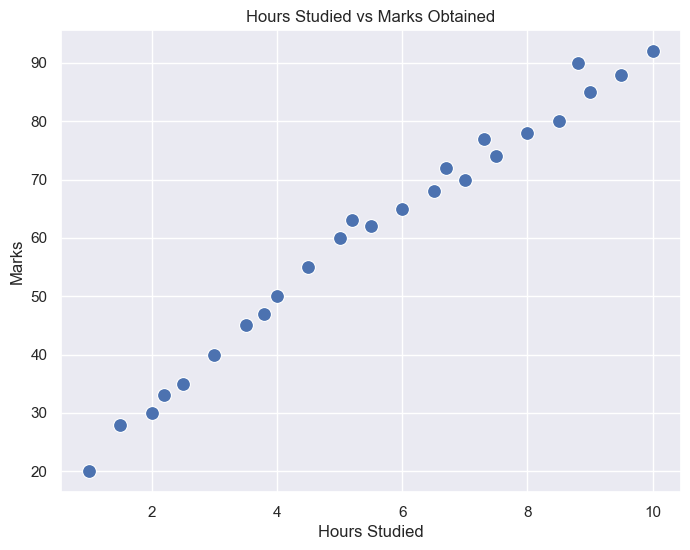


Predicted Marks: [60.1961196  91.1347683  25.39013981 74.11851151 71.79811286]
Actual Marks: [62, 88, 20, 77, 70]

Model Performance:
R² Score: 0.9803
Mean Absolute Error: 3.00
Mean Squared Error: 10.73


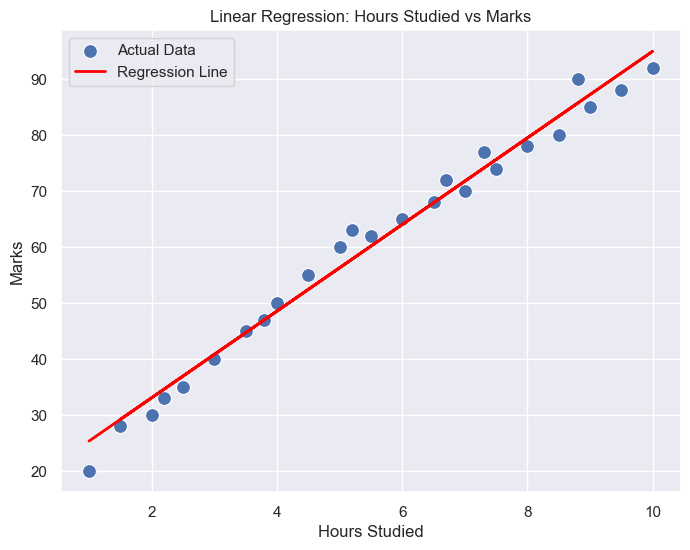


--------------------------------------
        FINAL MODEL SUMMARY
--------------------------------------
Intercept: 17.66
Coefficient (Slope): 7.73
R² Score: 0.9803
--------------------------------------


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
sns.set_theme()
df = pd.read_csv("student_scores.csv")   # Dataset in the same folder
print("Dataset Loaded Successfully!\n")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Hours_Studied"], y=df["Marks"], s=100)
plt.title("Hours Studied vs Marks Obtained")
plt.xlabel("Hours Studied")
plt.ylabel("Marks")
plt.show()
X = df[["Hours_Studied"]]
y = df["Marks"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nPredicted Marks:", y_pred)
print("Actual Marks:", list(y_test))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Hours_Studied"], y=df["Marks"], s=100, label="Actual Data")
plt.plot(df["Hours_Studied"], model.predict(df[["Hours_Studied"]]), 
         color='red', linewidth=2, label="Regression Line")
plt.title("Linear Regression: Hours Studied vs Marks")
plt.xlabel("Hours Studied")
plt.ylabel("Marks")
plt.legend()
plt.show()
print("\n--------------------------------------")
print("        FINAL MODEL SUMMARY")
print("--------------------------------------")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"R² Score: {r2:.4f}")
print("--------------------------------------")
